## Классификация

Задача классификации (classification) — задача, в которой мы пытаемся предсказать класс объекта на основе признаков в наборе данных. То есть задача сводится к предсказанию целевого признака, который является категориальным:
* бинарная;
* мультиклассовая

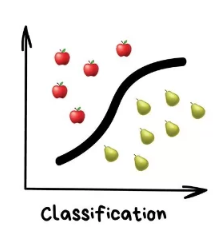

Для классификации всегда нужен учитель — размеченные данные с признаками и категориями, которые машина будет учиться определять по этим признакам.

Цель обучения — построить модель, которая на основе признаков разделяет объекты на классы наилучшим образом. С математической точки зрения это означает построение разделяющей поверхности для классов в пространстве признаков.

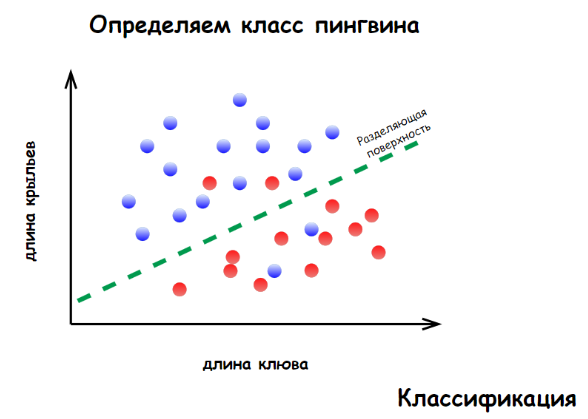

**Математическая постановка** задачи классификации:

Задано множество объектов $X = \{x_1, x_2, .., x_m\}$ и множество правильных ответов-меток классов $Y = \{y_1, y_2, .., y_m\}$, причём множество $Y$ конечно, т. е. $Y$ имеет ограниченный набор значений $Y = \{1, 2, .., k\}$, где $k$ — количество классов.

Множество объектов и множество правильных ответов связаны между собой неизвестной зависимостью, которая относит объект к определённому классу и записывается как $y = f(x)$ или $y : X \to Y$.

Необходимо найти такой алгоритм (модель) $a$, который способен разделять объекты на классы: $a = f(x)$ или $a : X \to Y$.


Для решения задачи классификации может использоваться множество моделей:
* логистическая регрессия (Logistic Regression);
* метод опорных векторов (SVM);
* деревья решений (Decision Tree);
* наивный байесовский классификатор (Naive Bayes);
* метод ближайших соседей (kNN);

### Логистическая регрессия

**Логистическая регрессия (Logistic Regression)** — одна из простейших моделей для решения задачи классификации. 

Логистическая функция (logistic function) $\sigma(z)$ или сигмόида (sigmoid):

$$
\begin{aligned}
\sigma(z) = \cfrac{1}{1 + e^{-z}}
\end{aligned}
$$

* Значения сигмоиды $\sigma(z)$ лежат в диапазоне от 0 до 1 при любых значения аргумента $z$;
* Сигмоида выдаёт значения $\sigma(z) > 0.5$ при её аргументе $z > 0$, $\sigma(z) < 0.5$ — при $z < 0$ и $\sigma(z) = 0.5$ — при $z = 0$.


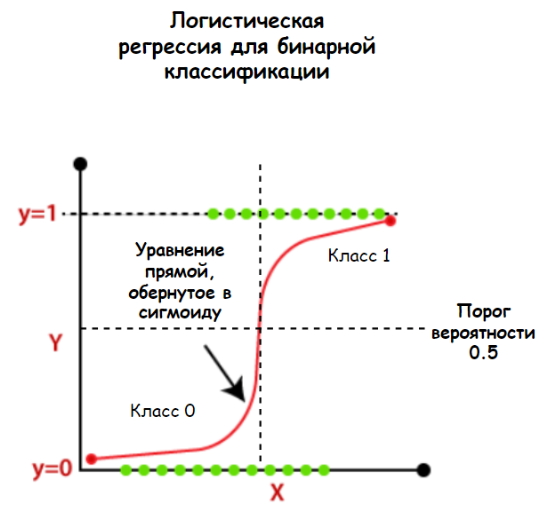


**Основная идея** модели логистической регрессии: 

возьмём модель линейной регрессии (обозначим её выход за $z$):

$$
\begin{aligned}
z = w_0 + \sum_{j=1}^m w_jx_j
\end{aligned}
$$

и подставим выход модели  в функцию сигмоиды, чтобы получить искомые оценки вероятности (^ - оценочные суждения, без - истинные значения):

$$
\begin{aligned}
\^{P} = \sigma(z) = \cfrac{1}{1 + e^{-z}} = \cfrac{1}{1 + e^{-w_0 - \sum_{j=1}^m w_jx_j}} = \cfrac{1}{1 + e^{-\={w} \={x}}}
\end{aligned}
$$

$$
\begin{aligned}
\^{y} = I[\^{P}] = \begin{cases}
   1, \^{P}>0.5 \\
   0, \^{P}<=0.5
\end{cases}
\end{aligned}
$$

$I[\^{P}]$ - индикаторная функция

Т.о. задача классификации сводится к задаче регрессии для предсказания вероятностей.

Чем больше расстояние от точки, находящейся выше разделяющей плоскости, до самой плоскости, тем больше оценка вероятности принадлежности к классу 1.

### Поиск параметров логистической регрессии

**Метод максимального правдоподобия (Maximum Likelihood Estimation — MLE)**

**Правдоподобие** — это оценка того, насколько вероятно получить истинное значение целевой переменной y при данных x и параметрах w. 

**Цель метода** — найти такие параметры w, в которых наблюдается максимум функции правдоподобия.

$$
\begin{aligned}
likelihood = \sum_i^n(y_i log(\^{P_i}) + (1 - y_i) log(1 - \^{P_i})) -> max_w
\end{aligned}
$$
* **$n$** — количество наблюдений;
* **$y_i$** — это истинный класс (1 или 0) для i-ого объекта из набора данных;
* **$\^{P_i} = \sigma(z_i)$** — предсказанная с помощью логистической регрессии вероятность принадлежности к классу 1 для i-ого объекта из набора данных;
* **$z_i$** — результат подстановки i-ого объекта из набора данных в уравнение разделяющей плоскости .
* **$log$** — логарифм (обычно используется натуральный логарифм).

Приведем задачу к привычному нам формату минимизации эмпирического риска:
$$
\begin{aligned}
L(w) = logloss = -likelihood -> min_w
\end{aligned}
$$

Для такой функции потерь только численные решения (градиентный спуск).

Регуляризация немного отличается:

При L1-регуляризации мы добавляем в функцию потерь $L(w)$ штраф из суммы модулей параметров, а саму функцию logloss умножаем на коэффициент C:
$$
\begin{aligned}
L(w) = C * logloss + \sum_{j=1}^m |w_j| -> min_w
\end{aligned}
$$

А при L2-регуляризации — штраф из суммы квадратов параметров:
$$
\begin{aligned}
L(w) = C * logloss + \sum_{j=1}^m (w_j)^2 -> min_w
\end{aligned}
$$

Значение коэффициента C — коэффициент, обратный коэффициенту регуляризации. Чем больше C, тем меньше «сила» регуляризации.

Параметры **sklearn.linear_model.LogisticRegression**:
* **random_state** — число, на основе которого происходит генерация случайных чисел.
* **penalty** — метод регуляризации. Возможные значения:
    - **'l1'** — L1-регуляризация;
    - **'l2'** — L2-регуляризация (используется по умолчанию);
    - **'elasticnet'** — эластичная сетка (L1+L2);
    - **'none'** — отсутствие регуляризации.
* **C** — коэффициент обратный коэффициенту регуляризации, то есть равен . Чем больше C, тем меньше регуляризация. По умолчанию C=1, тогда α=1.
* **solver** — численный метод оптимизации функции потерь logloss, может быть:
    - **'sag'** — стохастический градиентный спуск (нужна стандартизация/нормализация);
    - **'saga'** — модификация предыдущего, которая поддерживает работу с негладкими функциями (нужна стандартизация/нормализация);
    - **'newton-cg'** — метод Ньютона с модификацией сопряжённых градиентов (не нужна стандартизация/нормализация);
    - **'lbfgs'** — метод Бройдена — Флетчера — Гольдфарба — Шанно (не нужна стандартизация/нормализация; используется по умолчанию, так как из всех методов теоретически обеспечивает наилучшую сходимость);
    - **'liblinear'** — метод покоординатного спуска (не нужна стандартизация/нормализация).
* **max_iter** — максимальное количество итераций, выделенных на сходимость.

### Метрики классификации

**Матрица ошибок (confusion matrix)** показывает все возможные исходы совпадения и несовпадения предсказания модели с действительностью. Используется для расчёта других метрик.

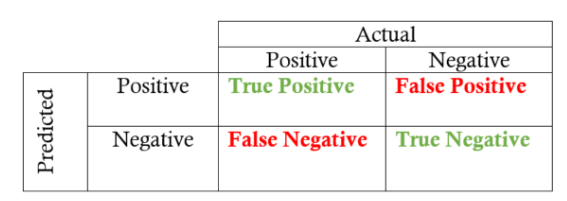

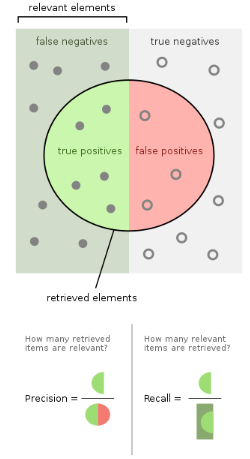

**Accuracy (достоверность)** — доля правильных ответов модели среди всех ответов. Правильные ответы — это истинно положительные (True Positive) и истинно отрицательные ответы (True Negative):

$$
\begin{aligned}
accuracy = \cfrac{TP + TN}{TP + FP + TN + FN}
\end{aligned}
$$

Интерпретация: как много (в долях) модель угадала ответов. Она бесполезна, если классы сильно несбалансированы.

**Precision (точность), или PPV (Positive Predictive Value)** — это доля объектов, которые действительно являются положительными, по отношению ко всем объектам, названным моделью положительными.

$$
\begin{aligned}
precision = \cfrac{TP}{TP + FP}
\end{aligned}
$$

Интерпретация: способность отделить класс 1 от класса 0. Чем больше precision, тем меньше ложных попаданий. 
Precision нужен в задачах, где от нас требуется минимум ложных срабатываний. Чем выше «цена» ложноположительного результата, тем выше должен быть precision.

**Recall (полнота), или TPR (True Positive Rate)** — это доля объектов, названных классификатором положительными, по отношению ко всем объектам положительного класса.

$$
\begin{aligned}
recall = \cfrac{TP}{TP + FN}
\end{aligned}
$$

Интерпретация: способность модели обнаруживать класс 1 вообще, то есть охват класса 1. Заметьте, что ложные срабатывания не влияют на recall. Recall очень хорошо себя показывает в задачах, где важно найти как можно больше объектов, принадлежащих к классу 1.

Метрики precision и recall не зависят от сбалансированности классов и в совокупности дают довольно исчерпывающее представление о классификаторе. Однако на практике часто бывает так, что увеличение одной из метрик может привести к уменьшению другой.

**$F_{\beta}$ (F-мера)** — это взвешенное среднее гармоническое между precision и recall:

$$
\begin{aligned}
F_{\beta} = (1 + \beta^2)\cfrac{precision * recall}{precision + recall}
\end{aligned}
$$

где $\beta$ — это вес precision в метрике: чем больше $\beta$, тем больше вклад.

Метрика равна своему максимуму (1), если и precision, и recall равны 1. Но если хотя бы одна из метрик будет близка к 0, то и  будет близка к 0. 

Сравнение метрик:

<font color=gray size=2>НАЗВАНИЕ</font> | <font color=gray size=2>ФОРМУЛА</font>| <font color=gray size=2>ИНТЕРПРЕТАЦИЯ И ПРИМЕНЕНИЕ </font>| <font color=gray size=2>ДОСТОИНСТВА</font>	| <font color=gray size=2>НЕДОСТАТКИ</font> | <font color=gray size=2>ФУНКЦИЯ В МОДУЛЕ METRICS БИБЛИОТЕКИ SKLEARN</font>
--|--|--|--|--|--
<font size=2>ACCURACY (ДОСТОВЕРНОСТЬ)</font> | $\frac{TP + TN}{TP + FP + TN + FN}$ | <font color=gray size=2>Доля правильных ответов среди всех ответов модели. Применяется в задачах, где классы сбалансированы.</font> |	<font color=gray size=2>Очень легко интерпретировать. Автоматически можно посчитать процент ошибок модели как 1 - accuracy.</font> | <font color=gray size=2>Плохо показывает себя на сильно несбалансированных классах.</font> |	accuracy_score()
<font size=2>PRECISION (ТОЧНОСТЬ)</font> | $\frac{TP}{TP + FP}$ | <font color=gray size=2>Способность модели отделять класс 1 от класса 0. Используется в задачах, где важно минимальное количество ложных срабатываний модели. </font>| <font color=gray size=2>Можно использовать на несбалансированных выборках.</font> |	<font color=gray size=2>Вычисляется только для положительного класса — класса 1. Для класса 0 показатель необходимо вычислять отдельно. Не даёт представления о том, как много объектов положительного класса из общей совокупности нашёл алгоритм.</font> |	precision_score()
<font size=2>RECALL (ПОЛНОТА)</font> | $\frac{TP}{TP + FN}$ | <font color=gray size=2>Способность модели находить класс 1. Используется в задачах, где важно охватить как можно больше объектов положительного класса (1).</font> | <font color=gray size=2>Можно использовать на несбалансированных выборках.	| <font color=gray size=2>Вычисляется только для положительного класса — класса 1. Для класса 0 показатель необходимо вычислять отдельно. Не даёт представления о том, насколько точно модель находит объекты положительного класса (как много ложных срабатываний).</font> |	recall_score()
<font size=2>F-МЕРА</font>	| $\small{(1 + \beta^2)} * \frac{precision * recall}{precision + recall}$ | <font color=gray size=2>Нет бизнес-интерпретации. Используется в задачах, где необходимо балансировать между precision и recall. | <font color=gray size=2>Даёт обобщённое представление о точности и полноте. Максимум достигается, когда максимальны обе метрики, минимум — когда хотя бы одна из метрик равна 0. При желании можно использовать обобщённый вариант — , чтобы управлять вкладом precision в общую метрику.| <font color=gray size=2>Отсутствие интерпретации не даёт интуитивного понимания человеку, не знакомому с этой метрикой. |	f1_score()

### Мультиклассовая классификация

Если у нас есть $k$ различных классов ($k>2$), давайте обучим $k$ классификаторов, каждый из которых будет предсказывать вероятности принадлежности каждого объекта к определённому классу.

Например, у нас есть три класса, обозначенные как 0, 1 и 2. Тогда мы обучаем три классификатора: первый из них учится отличать класс 0 от классов 1 и 2, второй — класс 1 от классов 0 и 2, а третий — класс 2 от классов 1 и 0. Таким образом, класс, на который «заточен» классификатор, мы обозначаем как 1, а остальные классы — как 0.

Когда каждая из трёх моделей сделает предсказание вероятностей для объекта, итоговый классификатор будет выдавать класс, который соответствует самой «уверенной» модели.

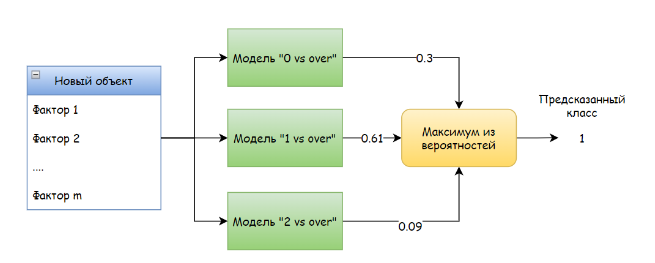

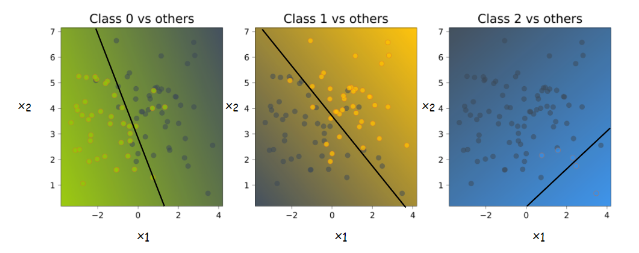

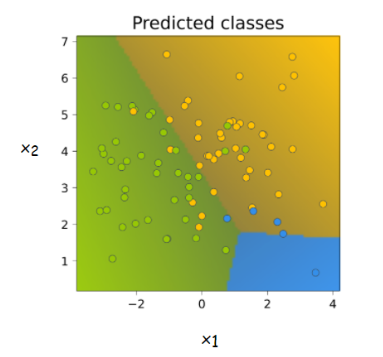

Модель логистической регрессии легко обобщается на случай мультиклассовой классификации. Пусть мы построили несколько разделяющих плоскостей с различными наборами параметров $k$, где $k$ — номер классификатора. То есть имеем $K$ разделяющих плоскостей:

$$
\begin{aligned}
z_k = w_{0k} + \sum_{j=1}^mw_{jk}x_j = w_k * x
\end{aligned}
$$

Чтобы преобразовать результат каждой из построенных моделей в вероятности в логистической регрессии, используется функция **softmax** — многомерный аналог сигмоиды:

$$
\begin{aligned}
\^{P_k} = softmax(x_k) = \cfrac{exp(\^{y_k})}{\sum_{k=1}^Kexp(\^{y_{jk}})}
\end{aligned}
$$

Данная функция выдаёт нормированные вероятности, то есть в сумме для всех классов вероятность будет равна 1.

**Плюсы**:
* Простой, интерпретируемый, но в то же время эффективный алгоритм. Благодаря этому он очень популярен в мире машинного обучения;
* Поиск параметров линейный или квадратичный (в зависимости от метода оптимизации), то есть ресурсозатратность алгоритма очень низкая;
* Не требует подбора внешних параметров (гиперпараметров), так как практически не зависит от них.

**Минус**:
* Алгоритм работает хорошо, только когда классы линейно разделимы, что в реальных задачах бывает очень редко. Поэтому обычно данная модель используется в качестве baseline.

Недостаток с линейной разделимостью классов можно побороть с помощью введения полиномиальных признаков, тем самым снизив смещение модели. Тогда логистическая регрессия вместо разделяющей плоскости будет означать выгнутую разделяющую поверхность сложной структуры.

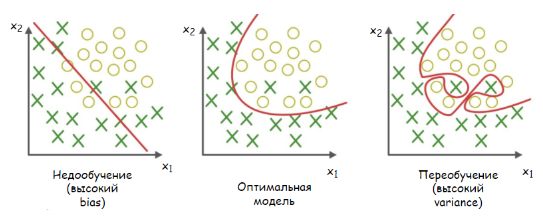

### [Практика](/tasks/Classification.LogisticRegression.ipynb)